In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
# 인위적인 2차원 데이터셋
X, y = make_blobs(random_state=0, n_samples=12, n_features=2)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블 : \n{}".format(clusters))

클러스터 레이블 : 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


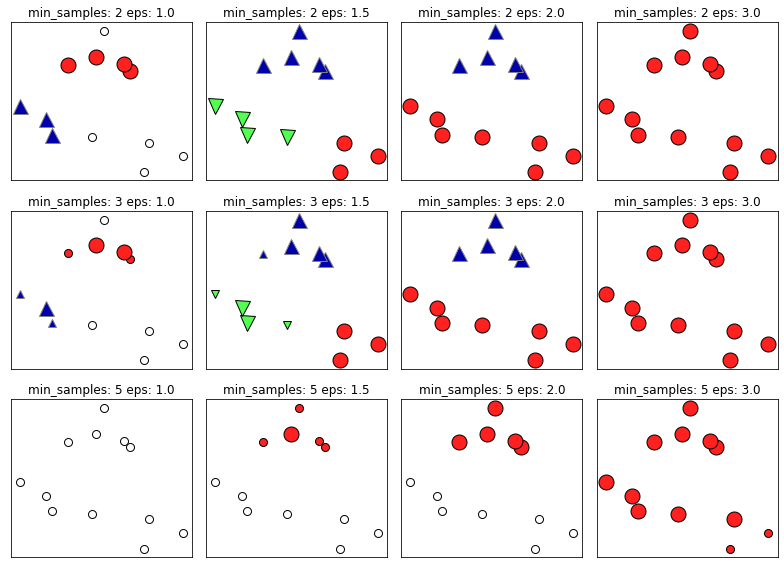

In [2]:
import mglearn
mglearn.plots.plot_dbscan()


np.unique(clusters_MMS) 예측핚 레이블: [0]


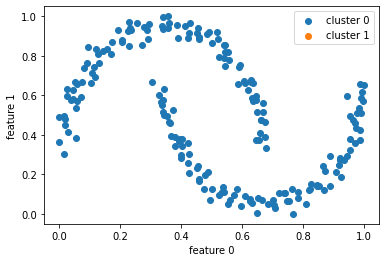

In [3]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False # - 문자 깨지는 부분 해결
x, y = make_moons(n_samples=200, noise=0.05, random_state=0) # dataset
# MinMaxScaler 메소드로 전처리
scaler_MMS = MinMaxScaler().fit(x) 
x_scaled_MMS = scaler_MMS.transform(x) # 전처리 메소드를 훈렦데이터에 적용
dbscan = DBSCAN() # 모델생성
clusters_MMS = dbscan.fit_predict(x_scaled_MMS) # 모델 학습
print('np.unique(clusters_MMS) 예측핚 레이블: {}'.format(np.unique(clusters_MMS))) # [0]
df = np.hstack([x_scaled_MMS, clusters_MMS.reshape(-1, 1)]) # x_scaled_ss 오른쪽에 1열 붙이기
df_ft0 = df[df[:,2]==0, :] # 클러스터 0 추출
df_ft1 = df[df[:,2]==1, :] # 클러스터 1 추출
plt.scatter(df_ft0[:, 0], df_ft0[:, 1], label='cluster 0', cmap='Pairs') # x, y, label, 색상
plt.scatter(df_ft1[:, 0], df_ft1[:, 1], label='cluster 1', cmap='Pairs')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend()
plt.show()

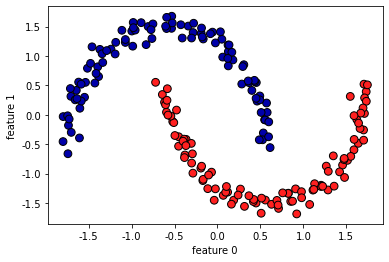

In [4]:
from sklearn.datasets import make_moons # two_moons데이터셋 생성
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import mglearn
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False # - 문자 깨지는 부분 해결
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN() # 기본값 eps=0.5, eps=0.7, eps=0.2
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()


In [5]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
 mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# 0~255 사이의 흑백 이미지를 픽셀 값을 0~1 스케일로 조정
# MinMaxScaler 적용과 비슷
X_people = X_people / 255.
# 차원 축소
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)
print("1")

c:\ai\pythonproject\venv\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


1


In [7]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유핚 레이블 \n{}".format(np.unique(labels)))
# min_samples=3 인 경우
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유핚 레이블 \n{}".format(np.unique(labels)))
# min_samples=3, eps=15 인 경우
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유핚 레이블 \n{}".format(np.unique(labels)))
print("클러스터 별 포인트 수: {}".format(np.bincount(labels + 1)))

고유핚 레이블 
[-1]
고유핚 레이블 
[-1]
고유핚 레이블 
[-1  0]
클러스터 별 포인트 수: [  31 2032]
